<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/LissajousCurve_multipleFrequencyRatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Lissajous curve</h1></b>

Dr. Bingsen Wang

11/3/2024
</center>

#Lissajous Curve

The Lissajous curve is defined by the parametric equations
$$\begin{align}
x &= A\sin(at+\delta)\\
y &= B\sin(bt)\end{align}\tag{1}$$

#Python Code


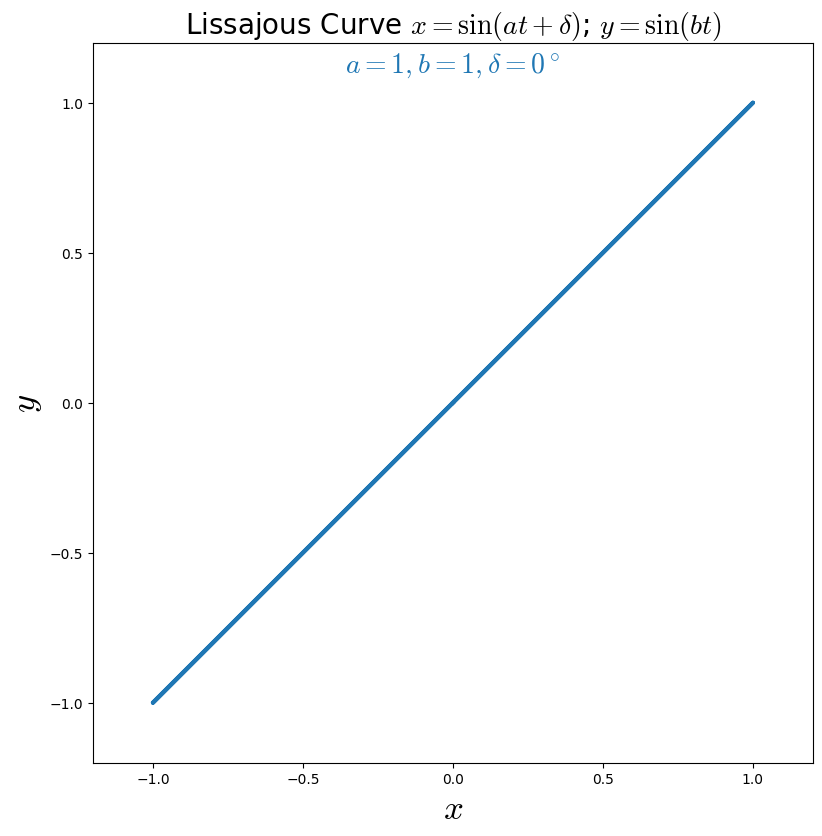

In [ ]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,cm,transforms
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def f(w,t,theta):
  return sin(w*t+theta)
#parameters
t=linspace(0,2*pi,2000)
a = [1,1,1,2,3,3,4,5,5,6,7,7,8, 9,9,10]
b = [1,2,3,3,4,5,5,6,7,7,8,9,9,10,11,11]
d = [0,pi/4,pi/2,3*pi/4,pi]

clst = list(cm.tab10.colors) #colors of lines
fig = plt.figure(figsize=(9,9))
xlim=[-1.2,1.2]
ylim=[-1.2,1.2]
ax=fig.add_axes((.1,.1,.8,.8),xlim=xlim, ylim=ylim,fc='none') #no fc
ax.set_title(r'Lissajous Curve $x=\sin(at+\delta)$; $y=\sin(bt)$',size=20,ha='center')
ax.set_xlabel(r'$x$',size=25)
ax.set_ylabel(r'$y$',size=25)
line=ax.plot([], [], '-',lw=3)[0] #dotted line
dot = ax.scatter([],[],s=120,marker='o')
txt_para = ax.text(0,1.1,'',size=20,ha='center')
# animation function. This is called sequentially
def animate(ii):
  # ii=6*len(d)
  k=ii%len(d)
  i=ii//len(d)
  txt_para.set_text(rf'$a={a[i]},b={b[i]},\delta={d[k]/pi*180:.0f}^\circ$')
  txt_para.set_color(clst[k])
  x = f(a[i],t,d[k])
  y = f(b[i],t,0)
  line.set_data(x,y)
  line.set_color(clst[k])
  # dot.set_offsets([x[i],y[i]])
  # dot.set_color(clst[k])
  return
anim = animation.FuncAnimation(fig, animate, frames=len(a)*len(d), interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
anim.save("LissajousCurve_multiRadio.mp4", writer=animation.FFMpegWriter(fps=4), dpi = 300)